In [1]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
data = pd.read_csv("tweets_v8.csv")

In [4]:
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...
80014,Sale X Low,USA,"Sale X Low, the cheapest low price online stor...",2021-04-03 20:49:35+00:00,12,49,7,False,2021-10-28 13:46:26+00:00,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,SocialRabbit Plugin,False
80015,RevAAA,NaN,Review Anything Anyone Anywhere,2010-11-24 21:48:53+00:00,6907,0,0,False,2021-10-28 13:45:38+00:00,SQUID GAME was reviewed on RevAAA #squidgame \...,Twitter for iPhone,False
80016,Omo K-Pop News,NaN,OMO K-Pop\nNews and Updates,2021-09-22 12:01:24+00:00,152,807,593,False,2021-10-28 13:45:00+00:00,Back &amp; Forth Between ‘Squid Game’ Creator ...,Twitter Web App,False
80017,🎃Pumpkin💀Queen 🕸,Halloweentown 🎃,Creator of Stuff | Horror fan | Traveler | Bad...,2009-02-19 17:09:28+00:00,8048,8822,68980,False,2021-10-28 13:44:57+00:00,So what sort of games do you think they'll pla...,Twitter for Android,False


In [5]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'source', 'is_retweet'],
      dtype='object')

In [6]:
data.isnull().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

In [7]:
data = data.drop(columns='user_location',axis=1)

In [8]:
data

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...
80014,Sale X Low,"Sale X Low, the cheapest low price online stor...",2021-04-03 20:49:35+00:00,12,49,7,False,2021-10-28 13:46:26+00:00,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,SocialRabbit Plugin,False
80015,RevAAA,Review Anything Anyone Anywhere,2010-11-24 21:48:53+00:00,6907,0,0,False,2021-10-28 13:45:38+00:00,SQUID GAME was reviewed on RevAAA #squidgame \...,Twitter for iPhone,False
80016,Omo K-Pop News,OMO K-Pop\nNews and Updates,2021-09-22 12:01:24+00:00,152,807,593,False,2021-10-28 13:45:00+00:00,Back &amp; Forth Between ‘Squid Game’ Creator ...,Twitter Web App,False
80017,🎃Pumpkin💀Queen 🕸,Creator of Stuff | Horror fan | Traveler | Bad...,2009-02-19 17:09:28+00:00,8048,8822,68980,False,2021-10-28 13:44:57+00:00,So what sort of games do you think they'll pla...,Twitter for Android,False


In [9]:
data = data.drop(columns='user_description',axis=1)

In [10]:
data.isnull().sum()

user_name          4
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
source             0
is_retweet         0
dtype: int64

In [11]:
data.dropna()

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...
80014,Sale X Low,2021-04-03 20:49:35+00:00,12,49,7,False,2021-10-28 13:46:26+00:00,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,SocialRabbit Plugin,False
80015,RevAAA,2010-11-24 21:48:53+00:00,6907,0,0,False,2021-10-28 13:45:38+00:00,SQUID GAME was reviewed on RevAAA #squidgame \...,Twitter for iPhone,False
80016,Omo K-Pop News,2021-09-22 12:01:24+00:00,152,807,593,False,2021-10-28 13:45:00+00:00,Back &amp; Forth Between ‘Squid Game’ Creator ...,Twitter Web App,False
80017,🎃Pumpkin💀Queen 🕸,2009-02-19 17:09:28+00:00,8048,8822,68980,False,2021-10-28 13:44:57+00:00,So what sort of games do you think they'll pla...,Twitter for Android,False


##### The “text” column in the dataset contains the opinions of the users of Twitter about the squid game, as these are social media opinions, so this column needs to be prepared before any analysis

In [12]:
import nltk
import re
nltk.download('stopwords')  # Downloads the set of common stopwords in the English language(e.g., "the", "and", "is").
stemmer = nltk.SnowballStemmer("english") # A stemming algorithm used to reduce words to their base or root form(e.g., "running" becomes "run")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### The clean function standardizes and cleans the text data by:
* Lowercasing the text.
* Removing unnecessary characters like URLs, HTML tags, punctuation, and stopwords.
* Reducing words to their base form through stemming.

In [13]:
def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing Stopwords
    words = text.split(' ')
    filtered_words = [word for word in words if word not in stopword]
    text = " ".join(filtered_words)

    # Stemming the Words
    words = text.split(' ')
    stemmed_words = [stemmer.stem(word) for word in words]
    text = " ".join(stemmed_words)

    return text

In [14]:
# call function
data["text"] = data["text"].apply(clean)

In [15]:
data.text

0        life hit time poverti strike yougong yoo  let ...
1                          marbl episod squidgam  ruin 😭😭😭
2                                            squidgam time
3        blood  slideim join squidgam thing im alreadi ...
4        two first game player kill mask guy  bloodi ni...
                               ...                        
80014    yes yes yesarianagrandesquidgam  outerwear pro...
80015    squid game review revaaa squidgam review anyth...
80016    back amp forth squid game creator amp lebron j...
80017    sort game think theyll play inevit make squidg...
80018    venanciotaylor tracklist cala boca swifter gfv...
Name: text, Length: 80019, dtype: object

In [16]:
text = " ".join(i for i in data.text)

In [17]:
stopwords = set(STOPWORDS)

In [18]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

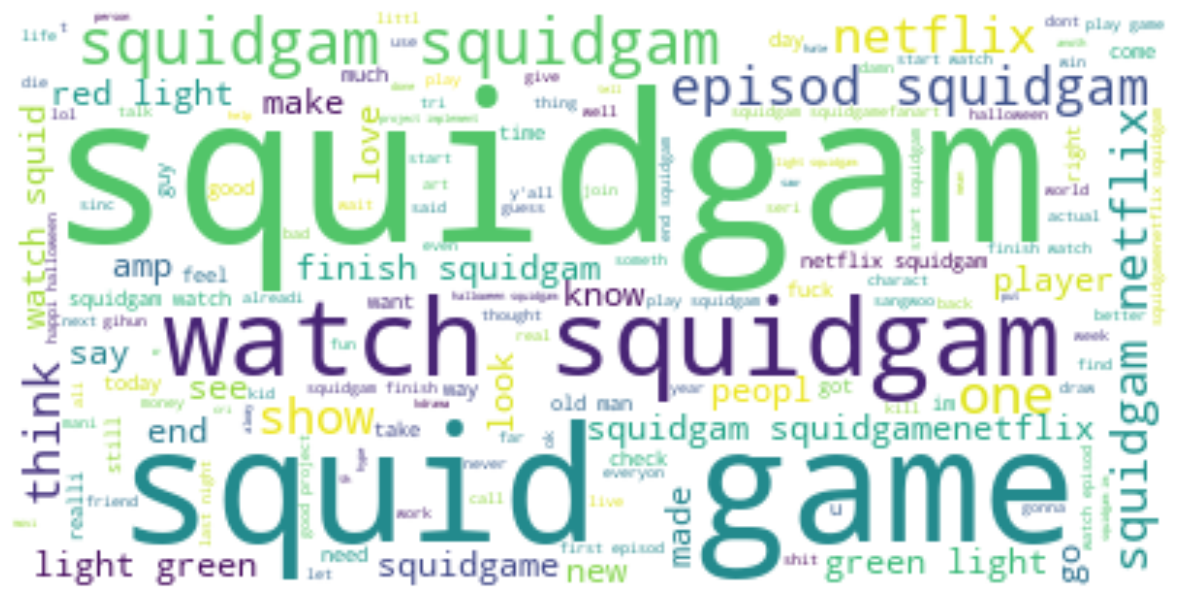

In [19]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [21]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\janna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
# Initialize empty lists to store sentiment scores
positive_scores = []
negative_scores = []
neutral_scores = []

In [23]:
# Loop through each text entry in the data["text"] column
for text in data["text"]:
    sentiment_scores = sentiments.polarity_scores(text)  # Get sentiment scores
    positive_scores.append(sentiment_scores["pos"])  # Append positive score
    negative_scores.append(sentiment_scores["neg"])  # Append negative score
    neutral_scores.append(sentiment_scores["neu"])   # Append neutral score

In [24]:
# Assign the lists to the corresponding columns in the DataFrame
data["Positive"] = positive_scores
data["Negative"] = negative_scores
data["Neutral"] = neutral_scores

In [25]:
# Keep only the relevant columns
data = data[["text", "Positive", "Negative", "Neutral"]]

In [26]:
data

,text,Positive,Negative,Neutral
0,life hit time poverti strike yougong yoo let ...,0.173,0.108,0.719
1,marbl episod squidgam ruin 😭😭😭,0.000,0.487,0.513
2,squidgam time,0.000,0.000,1.000
3,blood slideim join squidgam thing im alreadi ...,0.142,0.277,0.581
4,two first game player kill mask guy bloodi ni...,0.000,0.461,0.539
...,...,...,...,...
80014,yes yes yesarianagrandesquidgam outerwear pro...,0.435,0.000,0.565
80015,squid game review revaaa squidgam review anyth...,0.000,0.000,1.000
80016,back amp forth squid game creator amp lebron j...,0.000,0.000,1.000
80017,sort game think theyll play inevit make squidg...,0.211,0.000,0.789


In [27]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

In [28]:
def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        return "Positive"
    elif (b > a) and (b > c):
        return "Negative"
    else:
        return "Neutral"


In [29]:
sentiment_score(x, y, z)

'Neutral'

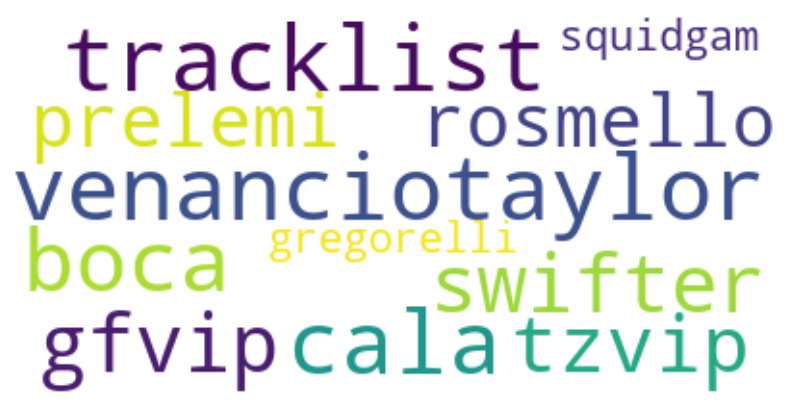

In [30]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()